In [7]:
from __future__ import division, print_function, unicode_literals
from sklearn import metrics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
import scipy.io


5 Original images


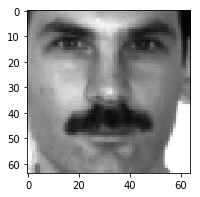

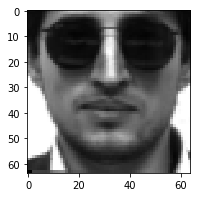

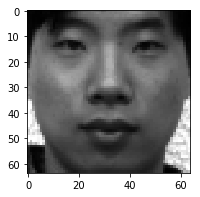

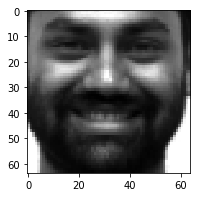

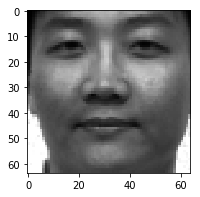

Images fo K= 10
Basis images-


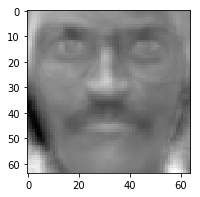

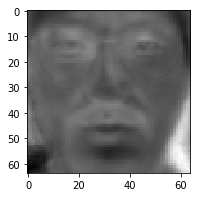

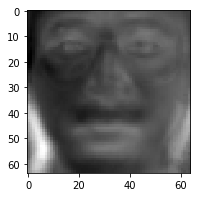

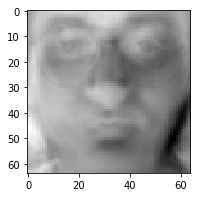

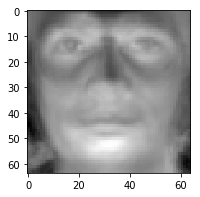

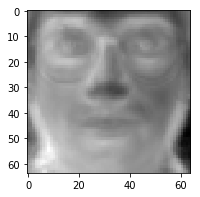

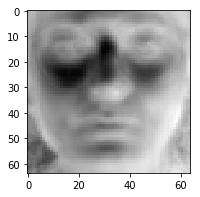

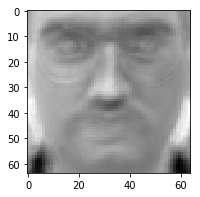

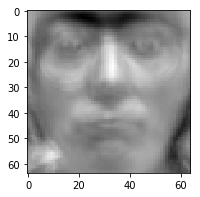

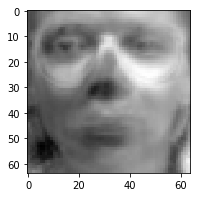

5 reconstructed images-


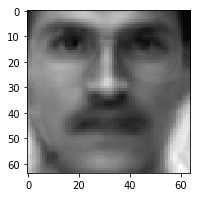

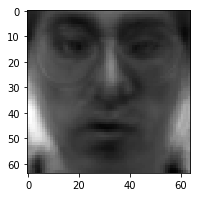

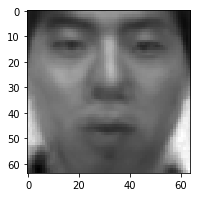

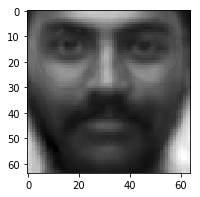

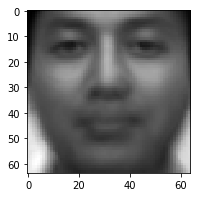

Images fo K= 20
Basis images-


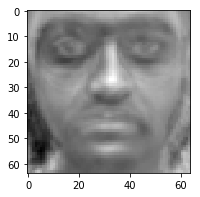

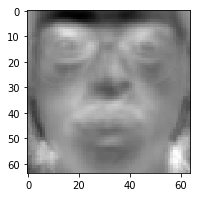

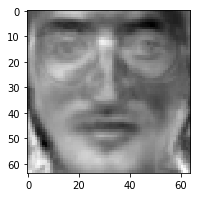

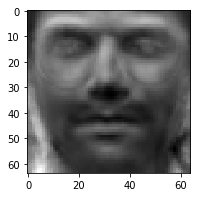

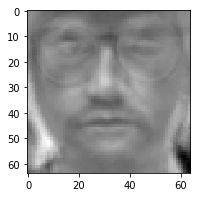

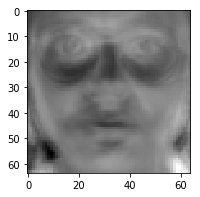

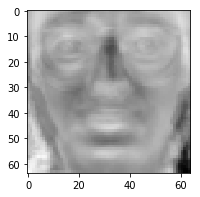

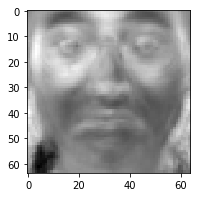

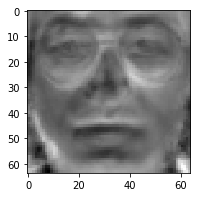

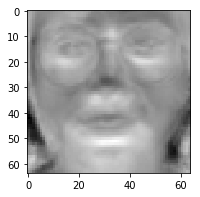

5 reconstructed images-


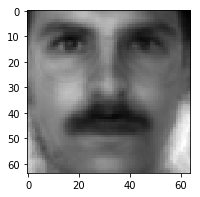

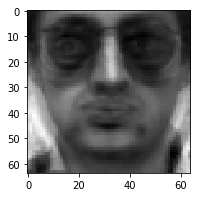

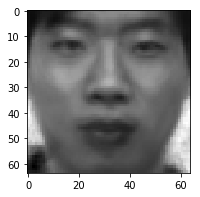

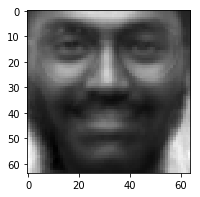

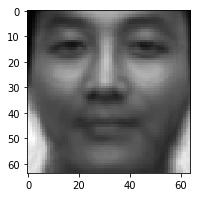

Images fo K= 30
Basis images-


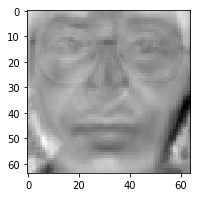

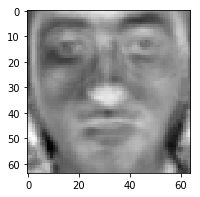

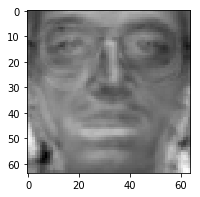

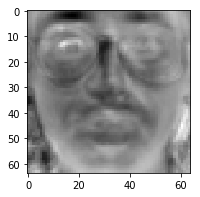

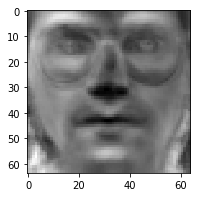

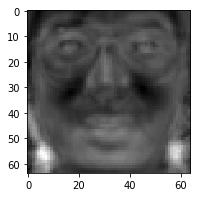

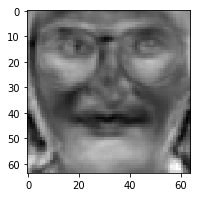

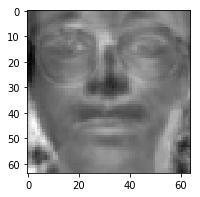

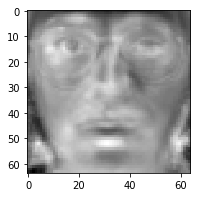

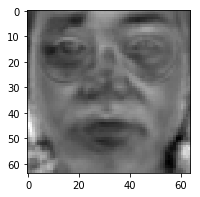

5 reconstructed images-


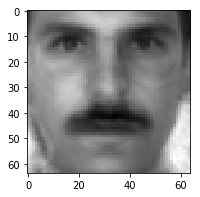

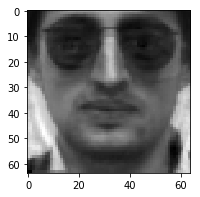

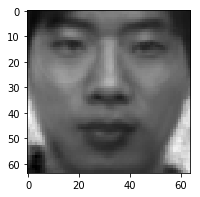

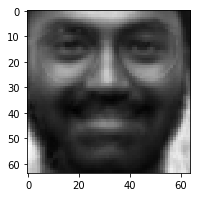

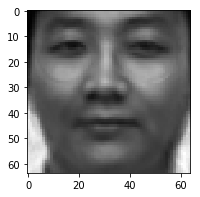

Images fo K= 40
Basis images-


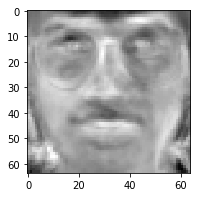

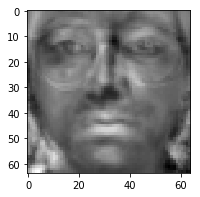

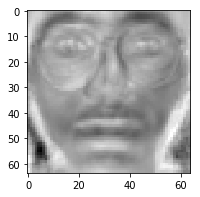

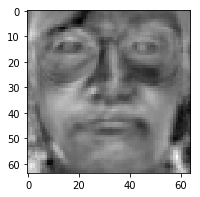

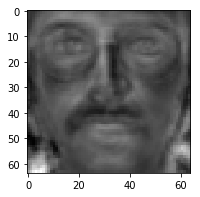

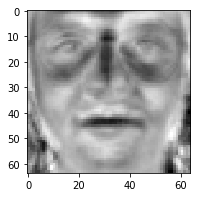

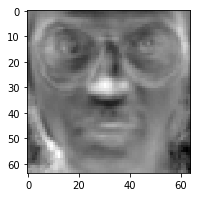

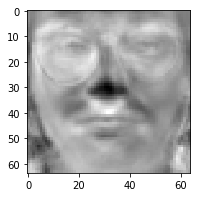

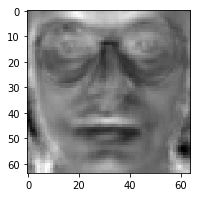

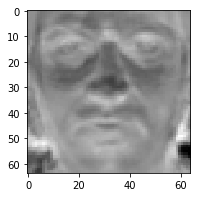

5 reconstructed images-


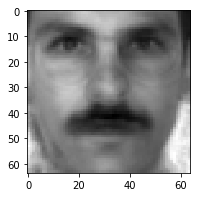

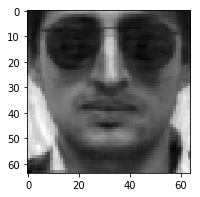

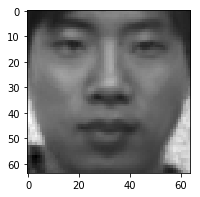

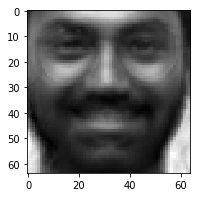

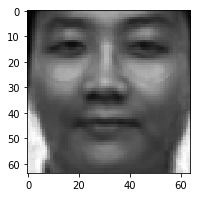

Images fo K= 50
Basis images-


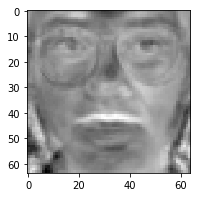

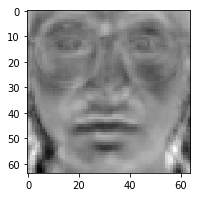

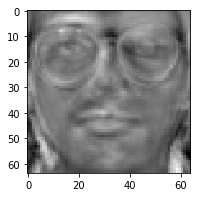

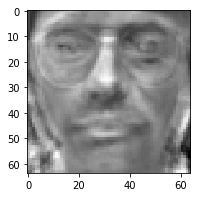

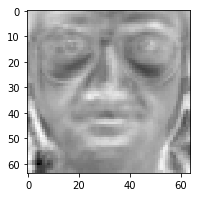

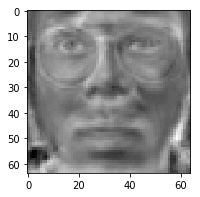

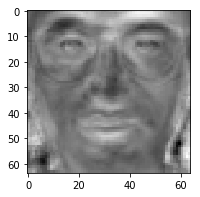

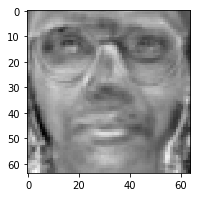

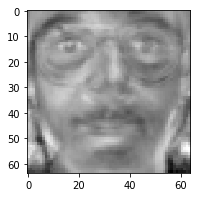

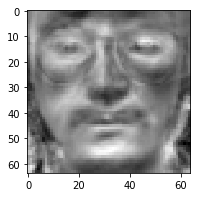

5 reconstructed images-


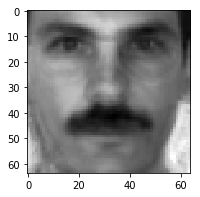

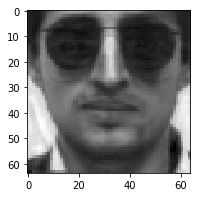

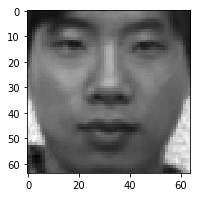

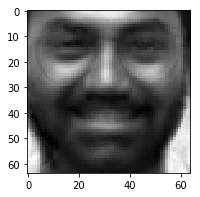

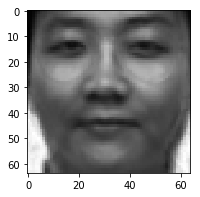

Images fo K= 100
Basis images-


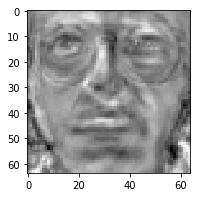

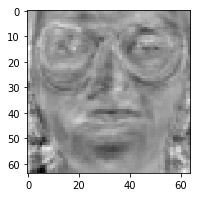

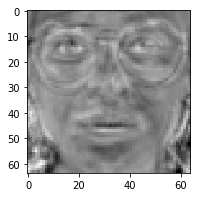

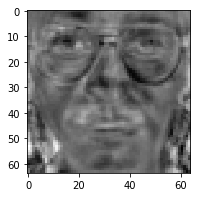

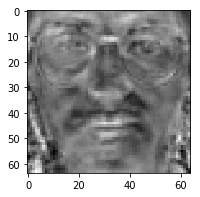

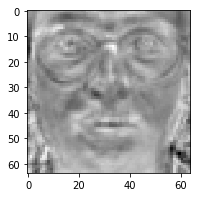

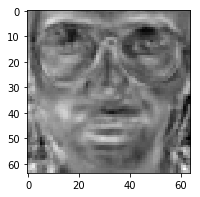

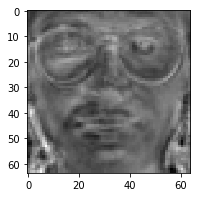

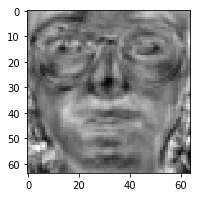

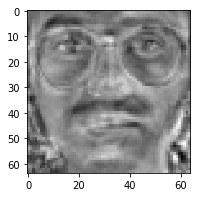

5 reconstructed images-


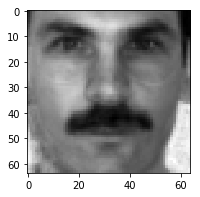

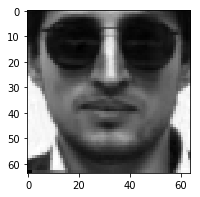

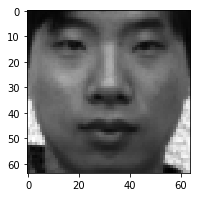

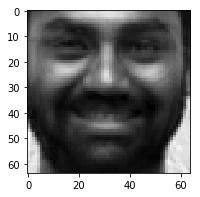

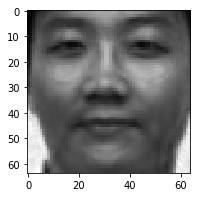

In [9]:
#loading data
X=scipy.io.loadmat('facedata.mat')
X=X['X']
I=X #saving the original image before mean centering
#mean centering
mu=np.mean(X,axis=0)
X=X-mu
print("5 Original images")
#printing original images
for r in [11,25,40,70,150]:
    x=np.reshape(I[r,:],(64,64))
    x=np.transpose(x)
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x,cmap='gray')
    plt.show()  
for K in [10,20,30,40,50,100]:
    #alt-opt
    W=np.random.rand(4096,K)
    for i in range(100):
        M=np.matmul(np.transpose(W),W)
        Zt=np.matmul(np.linalg.inv(M),np.transpose(W))
        Zt=np.matmul(Zt,np.transpose(X))
        W=np.matmul(np.matmul(np.transpose(X),np.transpose(Zt)),np.linalg.inv(np.matmul(Zt,np.transpose(Zt))))
    print("Images fo K=",K)
    print("Basis images-")
    l=np.linspace(0,K,11)
    l=l[:-1]
    #printing basis images
    for r in l:
        w=np.reshape(W[:,int(r)],(64,64))
        w=np.transpose(w)
        fig = plt.figure(figsize=(3,3))
        plt.imshow(w,cmap='gray')
        plt.show()
    print("5 reconstructed images-")
    #printing reconstructed images
    for r in [11,25,40,70,150]:
        x=mu+np.matmul(W,Zt[:,r])
        x=np.reshape(x,(64,64))
        x=np.transpose(x)
        fig = plt.figure(figsize=(3,3))
        plt.imshow(x,cmap='gray')
        plt.show()     
        
        